In [22]:
from sklearn.datasets import load_boston
Boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [24]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

## Computing estimates

In [91]:
d = {'variables':X.columns,'estimates':lm.coef_}
df = pd.DataFrame(data=d)
df

,variables,estimates
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


## Comparing model with real prices 

Text(0, 0.5, 'predicted prices')

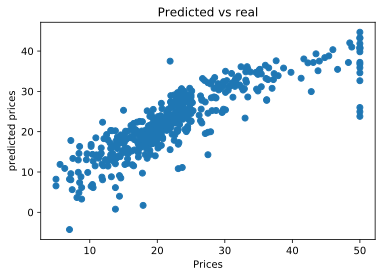

In [235]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X,Y)
Y_Pred=lm.predict(X)
plt.scatter(Y,Y_Pred)
plt.title('Predicted vs real')
plt.xlabel('Prices')
plt.ylabel('predicted prices')


## MSE ans R-square for model 

In [154]:
from sklearn import metrics  

print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_Pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_Pred)))


Mean Squared Error: 21.894831181729202
Root Mean Squared Error: 4.679191295697281


## Linear regression with CRIM variable

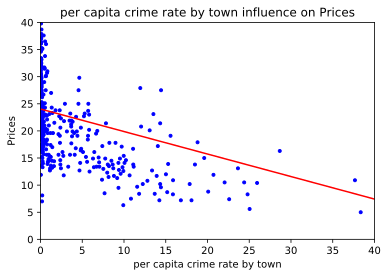

In [278]:
%matplotlib inline 
%config InlineBackend.figure_format= 'svg'
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
fit = np.polyfit(bos.CRIM,Y,1)
fit_fn = np.poly1d(fit) 
plt.scatter(bos.CRIM,Y, s=1)
plt.plot(bos.CRIM,Y,'b.', bos.CRIM, fit_fn(bos.CRIM), '-r')
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.title('per capita crime rate by town influence on Prices')
plt.xlabel('per capita crime rate by town')
plt.ylabel('Prices')
plt.show()



## Linear Regression with AGE variable

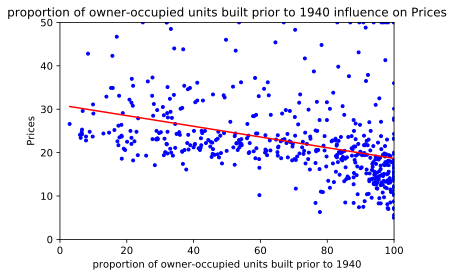

In [279]:
%matplotlib inline 
%config InlineBackend.figure_format= 'svg'
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
fit = np.polyfit(bos.AGE,Y,1)
fit_fn = np.poly1d(fit) 

plt.scatter(bos.AGE,bos.PRICE, s=2)
plt.plot(bos.AGE,Y,'b.', bos.AGE, fit_fn(bos.AGE), '-r')
plt.xlim(0, 100)
plt.ylim(0, 50)
plt.title('proportion of owner-occupied units built prior to 1940 influence on Prices')
plt.xlabel('proportion of owner-occupied units built prior to 1940')
plt.ylabel('Prices')
plt.show()

## Computing MSE for CRIM and NOX

In [98]:
lm=LinearRegression()
lm.fit(X[['CRIM']],bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [103]:
mseCRIM=np.mean((bos.PRICE-lm.predict(X[['CRIM']]))**2)
print(mseCRIM)
mseNOX=np.mean((bos.PRICE-lm.predict(X[['NOX']]))**2)
print(mseNOX)

71.69073588196666
85.6573374817831


## Computing R.Square 

In [255]:
from sklearn.metrics import r2_score
print('R_Square: ', r2_score(Y, Y_Pred))


R_Square:  0.7406426641094095


## Regression using high order polynomials var: NOX

RMSE:  7.9998386372965715
RSQUARE:  0.24191240588382268


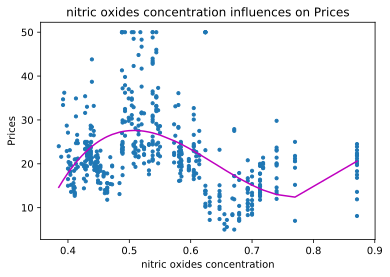

In [276]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

x =bos.NOX
y = Y

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print('RMSE: ',rmse)
print('RSQUARE: ',r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.title('nitric oxides concentration influences on Prices')
plt.xlabel('nitric oxides concentration')
plt.ylabel('Prices')
plt.show()

# Linear Regression by ourself

In [258]:
from numpy.linalg import inv
Xt=X.transpose()
a=np.matmul(Xt,X)
b=inv(a)
c=np.matmul(b,Xt)
w=np.matmul(c,Y)

Y_Pred2=w[0]*X.CRIM+w[1]*X.ZN+w[2]*X.INDUS+w[3]*X.CHAS+w[4]*X.NOX+w[5]*X.RM+w[6]*X.AGE+w[7]*X.DIS+w[8]*X.RAD+w[9]*X.TAX+w[10]*X.PTRATIO+w[11]*X.B+w[12]*X.LSTAT


Mean Squared Error: 24.166099330126492
Root Mean Squared Error: 4.915902697381885
R_Square:  0.7137381380515404


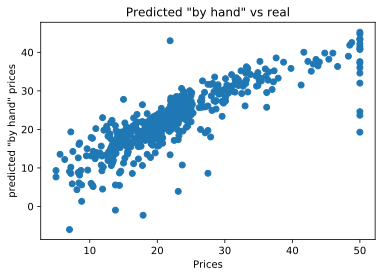

In [257]:
plt.scatter(Y,Y_Pred2)
plt.title('Predicted "by hand" vs real')
plt.xlabel('Prices')
plt.ylabel('predicted "by hand" prices')
from sklearn import metrics  

print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_Pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_Pred2)))
from sklearn.metrics import r2_score
print('R_Square: ', r2_score(Y, Y_Pred2))

We see that the model is similar but the manual way seems to give less precise results as R^2 is lower. 